In [1]:
# LSTM 분류기 만들어보기
# 로이터 뉴스 카테고리별로 분류하기
# 영화 리뷰 분류하기
# 여기서 LSTM과 CNN의 조합이 가능하다. 
# 여기서 데이터를 받으면 미래를 예측하는 예측 프로그램을 만드는 것을 목표로 하자.
# 분류기를 만드는 것도 중요하다. 연습이 많이 필요하다.
# 먼저 로이터뉴스 분류기를 만들어보자.
# 텍스트를 분류하는 것은 텍스트의 종류가 어떤 종류의 범주에 속하는지 구분하는 작업이다.
# 범주가 2가지라면 이진분류이며 세가지 이상이면 다중클래스 분류이다. 
# 레이블은 무조건 있어야 한다. 

In [2]:
# 나이브베이즈 분류는 햄메일과 스팸메일의 비율을 보고 단어의 비율을 확인하여 스팸을 판단하는 것이었다.
# 사실 스팸메일은 이진분류로 구분한다. 그래서 다대 1 구조를 가진다. 
# 단어들을 숫자로 바꾸는 작업을 수행해야 한다. 그리고 케라스의 임베딩기능으로 임베딩 작업을 해야한다. 
# 단어들에 대해 정수를 부여하고 등장빈도순으로 정수를 정렬한다.등장빈도 상위 1000개를 가지고 분류하는 것이다.
# 우리가 고민해야 할 것은 다음과 같다.
# 1. 타임 시퀀스(타임스텝)설정은 얼마나 할 것인가?
# 2. 단어에 대한 디멘전을 얼마나 설정할 것인가?
# 3. 배치사이즈는 어느정도로 설정할 것인가?
# 4. RNN,LSTM 출력차원을 어느것으로 할 것인가?
# 이러한 4개를 고민해야 한다. 

In [3]:
# 시행순서는 다음과 같다.
# - 데이터 준비단계 - 
# 1. 먼저 제목열을 추출하여 전처리를 해야한다. 
# 2. 공백으로 분리하거나 형태소 단위로 분리하거나 결국 분리를 해야한다. 
# 문제는 Konlpy를 안쓰면 형태소분석은 쉽지 않을 것이다. 
# 3. 불용어를 제거해야 하고 불필요한 단어, 조사등을 제거해야 한다. 
# 4. 유일한 단어를 파악하고 길이를 파악해야한다(코퍼스,말뭉치의 크기) 유니크와 비슷하다.
# 5. 각 단어에 숫자를 부여해주는 작업을 해야한다. 
# 6. 가장 긴 문장을 조사한다. 
# 7. 모든 문장의 길이를 동일하게 만들어야 한다. 가장 긴 문장의 길이에 맞춰서 할 수도 있다
# 또는 어느 수준까지 용인하는 전략도 존재한다.
# 여기까지가 데이터 준비과정이다. RNN, LSTM, ATTENTION에도 이건 항상 공통이다. 

In [5]:
# - 모델 설계 단계 - 
# 데이터를 준비한 이후에는  모델을 설계해야한다.
# 모델은 입력부, RNN 히든레이어, 출력차원 등을 정의해야 한다.
# 1. 임베딩 클래스 설정여부
# 임베딩 클래스가 있을 수도 있고 없을수도 있다. 그리고 가중치(웨이트)가 있을 수도 있다. 
# 단순 원 핫 인코딩을 이용하면 몇십만개의 데이터를 이용해야 한다. 
# 그것을 일일히 모델에 대입하면 속도가 매우 느려진다. 이것때문에 임베딩이 필요하다.
# 즉 몇만개, 몇십만개의 데이터를 작은 차원으로 임베딩하여 축소시켜야 속도를 더 빠르게 학습할 수 있다.
# 2. 일괄 학습 갯수
# 학습을 몇개를 한꺼번에 하는지 중요하다. 적정한 갯수의 학습을 설정하는 것이 중요할 것이다. 
# 배치사이즈를 설정하는 것은 속도에 영향을 준다. 10만개의 정보도 20배치로 설정하면 5천번 학습하게 된다.
# 3. 텍스트 출력차원 설정
# 텍스트는 다대일 문제에 속한다. 이진분류라면 binary_crossentropy 를 쓴다.
# 다중 분류라면 categorical_crossentropy를 손실함수로 쓰자.

In [ ]:
# 패스트텍스트
# 성능이 괜찮은 수준이다. 단어를 벡터로 만드는 방법은 페이스북에서 개발한 패스트텍스트를 쓰는것도 좋다.
# 워드투벡터보다 더 우수하다. 단어를 쪼개면 그 단어에도 다른 언어가 숨겨져 있다고 판단한다.
# 하나의 글자에는 여러 단어가 들어있다는 것을 전제로 학습한다. 한국어도 한자어 기반이면 글자마다 뜻이있다.
# 서브워드 학습이 핵심이다. n그램단위로 쪼갠다. 3그램 기준 <ap,app,ppl,ple,le> 이런식으로 쪼갠다.
# 그리고 꺽새를 붙인 토큰이 생긴다. <apple> 꺽새는 시작과 끝을 알려주기에 반드시 필요하다. 
# 그렇게 해서 apple의 벡터는 <ap,app,ppl,ple,le> ,<apple> 로 6개의 벡터화가 된다. 
# 한국어의 오타를 수정하는것에 매우 도움이 되는 모듈이다. 단어 하나에 아예 다른 뜻이 되는 특성상 유용하다.
# 즉 벡터화를 하는것은 똑같지만 투입되는 벡터는 여러개다. 요소 하나하나가 벡터값이 있다. 
# 그 모든 벡터를 더해서 apple이라는 벡터로 삼는 것이다. 
# 
# 또한 모르는 단어 업데이트도 주변 단어의 연관성을 파악하여 업데이트 한다.
# 모르는 단어가 없어도 유사도를 확인 가능하다. 만약 birthplace가 학습이 안되어있다고 하자.
# 그런데 birth, place가 존재한다면 이 두 가지의 값을 합쳐서 또 다른 벡터를 얻을 수 있다. 
# 그래서 모르는 단어에 대한 별도의 처리가 필요없이 기존 단어로 알아서 판단하는 것이다.
# 다른 모듈은 OOV를 따로 인코딩해서 별도의 칸을 뒀다. 
# 
# 단어 집합 내 빈도수가 적었떤 단어에 대한 대응도 가능해졌다. 
# 단어가 희귀단어라도 다른 단어의 n그램과 겹치면 비교적 높은 임베딩 벡터값을 얻는다. 
# 오타를 찾는 원리도 이것이다. 
# 
# 워드 투 벡터에서는 electrofishing이라는 단어가 존재하지 않는다. 
# 하지만 패스트텍스트는 electrolux가 바로 연관어로 나온다. 

In [6]:
# 한국어의 패스트텍스트
# 한국어는 이와 같이 처리된다.
# 자연어처리를 나눈다면 이렇게 된다.
# <자연,자연어, 연처리,어처리,처리>
# 또한 자모단위로 나누기도 한다.
# <ㅈ ㅏ _ ㅇ ㅕ ㄴ _ㅇ ㅓ _ ㅊ ㅓ _ㄹ ㅣ_ >
# 이런식으로 처리한다. 
# 물론 하나같이 한계점이 존재한다. 다의어에 반응을 못한다. 사과라는 단어는 과일, 죄송 도 있다. 
# 단순한 단어가지고 의미를 파악하기 힘들다. 딥러닝을 통해 단어를 구분할 수 있어야 한다.
# 한국어가 이래서 어렵다. 같은 문자인데도 다른 뜻을 가지기도 한다. 

In [7]:
# 엘모
# 우리가 아는 노동요 인형이다.
# 2018년에 제안된 새로운 임베딩 방법론이다. 
# bank account와 river bank의 bank의 차원이 같다는 문제점이 발생한다. 
# 엘모는 문장 단위로 임베딩하는 모델이다. 문장을 정방향으로도 두고 역방향으로도 두면서 학습시킨다.
# 정방향, 역방향 훈련을 합쳐서 학습시키는 방식이다. 
# 입력을 CNN으로 한다. 문자단위로 들어간다. 
# 학습하는 과정에서 존재하지 않는 단어도 찾아낸다. 
# 'NLP를 위한 합성곱 신경망'책에 자세히 적혀있다.
# 사과라는 단어만 보면 무슨말인지 모른다. 하지만 앞뒤의 문맥을 보고 사죄의 의미인지 과일인지 알 수 있다.
# 이후 BERT가 등장하게 된다. 

In [8]:
# BERT
# 단일 모델로 학습한다. 단방향 모델 두개를 결합하는 것이 아닌 양방향 특징을 학습하는 방식이다. 

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)
# num_words=1000은 뉴스기사에서 가장 많이 쓰인 1000개의 단어들을 가지고 오는 설정이다. 
# 이런 점에서 굉장히 유용하다. 

2110848/2110848 [==============================] - 0s 0us/step


In [13]:
X_train.shape # 8982건의 뉴스기사가 존재한다. 
# 내부값은 전부 숫자로 인코딩 되어져있는 상태이다. 리스트로 저장되어져있다. 

(8982,)

In [14]:
y_train # 뉴스기사의 카테고리이다. 
# 

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [16]:
np.max(y_train) # 카테고리는 46개의 카테고리가 존재한다. 
# 출력차원은 46차원으로 원 핫 인코딩을 해아하는 것을 확인했다. 

45

In [18]:
# 이번에 하는 것은 카테고리를 분류하는 알고리즘이다. 
len(X_train[0]) # 문제는 뉴스기사의 길이는 모두 다르다는 것이다. 
#  모든 문장의 최대 길이는 100으로 잡아보자

87

In [19]:
# 길이는 100개로 제한한다.
X_train=sequence.pad_sequences(X_train, maxlen=100)
X_test=sequence.pad_sequences(X_test, maxlen=100)


In [20]:
# 원 핫 인코딩이 필요하다. 카테고리컬로 나누자.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test) 

In [21]:
model = Sequential()                             # 모델 생성

In [22]:
model.add(Embedding(1000,100))                   # 1000개의 단어를 100차원으로 축소

In [23]:
model.add(LSTM(100))                             # 모델의 히든레이어는 LSTM

In [24]:
model.add(Dense(46,activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         100000    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 185046 (722.84 KB)
Trainable params: 185046 (722.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 카테고리 분류를 하는 것이기 때문에 분류 교차엔트로피를 쓴다.
# 학습조기중단 옵션도 지정하자.


In [28]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
# 검증데이터 5번을 확인해야 한다. 그런데 검증데이터는 없다. 
# 검증데이터를 만들ㄹ어도 되지만 그냥 내부에서 바로 지정해버리자. 

In [29]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

Epoch 1/200
450/450 [==============================] - 21s 43ms/step - loss: 2.2485 - accuracy: 0.4325 - val_loss: 1.9968 - val_accuracy: 0.5196
Epoch 2/200
450/450 [==============================] - 19s 42ms/step - loss: 1.7962 - accuracy: 0.5494 - val_loss: 1.6642 - val_accuracy: 0.5846
Epoch 3/200
450/450 [==============================] - 19s 43ms/step - loss: 1.5707 - accuracy: 0.5991 - val_loss: 1.5544 - val_accuracy: 0.6104
Epoch 4/200
450/450 [==============================] - 19s 42ms/step - loss: 1.4018 - accuracy: 0.6471 - val_loss: 1.4152 - val_accuracy: 0.6500
Epoch 5/200
450/450 [==============================] - 19s 42ms/step - loss: 1.2687 - accuracy: 0.6834 - val_loss: 1.3519 - val_accuracy: 0.6607
Epoch 6/200
450/450 [==============================] - 19s 43ms/step - loss: 1.1571 - accuracy: 0.7108 - val_loss: 1.2673 - val_accuracy: 0.6834
Epoch 7/200
450/450 [==============================] - 19s 43ms/step - loss: 1.0517 - accuracy: 0.7346 - val_loss: 1.1869 - val_ac

In [30]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))
# 1메가바이트가 안되는 모델임에도 꽤 잘 분류한다. 
# 출력차원만 지정해주면 꽤 깔끔하게 분류한다. 
# 케라스에서 코딩하기에 편하다. 텐서플로 시절에는 일일히 설계해야했다. 

71/71 [==============================] - 1s 19ms/step - loss: 1.2137 - accuracy: 0.7293

 Test Accuracy: 0.7293


In [ ]:
history = model.fit(X_train, y_train, batch_size=20, epochs=200, validation_split=0.2, callbacks=[early_stopping_callback])
# xtrain과 ytrain데이터를 나눠서 할 수 있긴 했다. 0.2 로 나눠서 하는 것이다. 



In [31]:
# 합성곱 신경망을 통해서 자연어처리가 가능하다.
# CNN으로 알고 있다. 합성곱 신경망을 이용하여 자연어처리를 하는 것이 시도가 되었다. 
# 이미지 처리를 이용해서 쓰던 딥러닝 모델이었는데 이것으로 언어처리를 하는 것이 의아할 수도 있다.
# 합성곱신경망은 합성곱층과 풀링층으로 구성된다. 
# 컴퓨터 입장에서의 그림은 픽셀마다 가지고 있는 값이 상이해서 사실상 다른 값이다. 
# 단순한 다층 퍼셉트론으로 보면 공간정보가 손실되기 때문에 공간적인 구조정보를 보존하는게 필요했다.
# 합성곱의 연산은 이미지가 가지고 있는 특징을 유지하는 특징을 가진다. 

In [ ]:
# 1d 합성곱
# 이미지에는 2d 합성곱을 사용한다. 자연어 처리에는 1d 합성곱을 사용한다.
# 입력을 받는 과정 자체는 동일하다. 벡터로 전환된 문장행렬로 LSTM으로 전달받는다. 
# n은 문장의 길이, k는 임베딩 벡터의 차원을 나타낸다고 하자. 
# 즉 임베딩 벡터의 차원이 6차원이고 글의 길이가 9개의 단어로 이루어져있다고 하자.
# 각 단어마다 벡터가 전부 다르게 입력될 것이다. 그것은 6개의 벡터를 가지고 있다. 
# 합성곱 연산에서 커널이 필요하다. 임베딩 벡터의 차원과 동일하게 설정한다. 즉 6차원이다. 
# 커널의 크기는 높이이다. 너비는 6차원으로 고정된 상태에서 높이를 곱한 것이 커널의 크기이다.
# 6,12,18,24 순으로 커널의 크기가 증가할 것이다. 커널 = 필터라고 생각하자.
# 커널의 크기가 달라지면 가중치의 갯수도 달라진다. 
# 필터의 갯수만큼 맥스풀링수치가 달라진다. 이것들을 연결해서 Dence로 연결하는 것이다. 
# 아쉽게도 대한민국에는 관련 논문이 많이 없다.


In [32]:
# 인코더-디코더
# RNN을 이용하여 인코더와 디코더가 나뉜다. 하나의 RNN을 인코더, 또 다른 RNN을 디코더로 정의한다. 
# 두 개의 RNN구조를 연결해서 사용하는 인코더 - 디코더 구조로 만들 수 있다. 
# 소위 말해 코덱이라고 부른다. 인코딩과 디코딩을 둘다 하는 역할을 한다. 
# 입력문장과 출력문장의 길이가 다른 경우에 사용한다. 번역에서 특히 많이 발생한다.
# 다대다 구조는 3개가 입력되면 3개가 출력되는 구조이다. 그래서 번역에는 적절치 않다. 

In [33]:
# 시퀀스 투 시퀀스
# 입력 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 방식이다. 기계번역에 쓰인다. 지금은 잘 안 쓰인다.
# 만약 질문과 답변으로 나오면 챗봇이 되고 번역문장이 나오면 번역기가 된다. 내용요약도 가능하다.
# 말하는 것을 언어로 정리하는 것도 가능하다. 
# 인코더 - 컨텍트 - 디코더 순으로 존재한다. 입력문장을 순차적으로 입력받는다. 
# 모든 단어 정보를 압축해서 하나의 벡터로 만든다. 이를 컨텍트 벡터라고 한다. 
# 인코더 내부에는 LSTM이 있다. 그리고 컨텍트를 거쳐서 디코더 lstm에 들어간다. 
# 그리고 훈련과정에는 교사학습을 진행한다. 
# 디코더는 eos를 만나기 전까지 계속해서 가동된다. 
# 그래서 문자 단위로 기계번역을 할때 자주 쓰인다. 
# 아쉬운 점은 단어번역을 하는데에 불리하다. 

In [34]:
# 어텐션 매커니즘
# 컨텍스트 벡터라는 하나의 크기로 고정되어있다는 것이 역으로 단점이 되었다.
# 왜냐하면 차원축소를 하는 경우에 정보손실이 발생했기 때문이다. 
# 문장의 길이가 길수록 정보손실이 심해진다.
# 또한 RNN은 고질적으로 기울기소실이 발생한다. 
# 입력 문장이 길면 품질이 떨어지는 문제를 해결하기 위해서 어텐션 매커니즘이 나오게 되었다.
# 여기서 어텐션은 특별한 정보/ 특별한 기억에 집중하자는 뜻이다. 
# LSTM처럼 가중치를 부여한다는 뜻이다. 말 내부에 중요도, 주제를 중시한다. 
# 양방향으로 훈련을 한다. 전방향 네트워크와 백워드 네트워크 둘 다 활용한다. 
# 이것으로 예측정확도가 많이 올라갔다. 
# 매 시점마다 인코더에서 전체 입력문장을 다시 참고한다. 
# 예측해야할 단어와 연관이 있는 입력 단어부분을 좀 더 집중해서 보게 된다. 
# 어텐션 웨이트가 존재한다. 어떤 RNN셀에 집중할지를 결정하는 것이다. 이 것이 핵심이다. 
# 어텐션 웨이트가 어텐션 매커니즘의 핵심이다. 물론 단어예측마다 매번 달라진다. 
# 어텐션 매커니즘과 시퀀스 투 시퀀스의 차이점은 컨텍트로 나오는 값은 따로 가중치로 나온다. 
# 기초적으로 다대다 구조로 Dense에 연결되고 거기에 컨텍트로 나오는 값을 가중한다. 
# 이 과정을 거치고 소프트맥스에 투입해서 첫 단어에 대한 결과를확률로 보인다. 그게 attention weight이다. 
# 컨텍트 벡터는 다음 시퀀스(모델)로 가게 된다. 
# 재밌는 것은 다음 모델에서 출력을 한 다음 결과값이 기존시퀀스의 Dense 가중치로 들어간다. 
# 즉 번역을 하는 와중에도 기존 시퀀스가 계속 관여한다는 뜻이다. 

In [106]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
data = pd.read_csv('tsla.us.txt')
data
# 테슬라 주가예측을 해보자. 

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0
...,...,...,...,...,...,...,...
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1858 non-null   object 
 1   Open     1858 non-null   float64
 2   High     1858 non-null   float64
 3   Low      1858 non-null   float64
 4   Close    1858 non-null   float64
 5   Volume   1858 non-null   int64  
 6   OpenInt  1858 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 101.7+ KB


In [109]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03,1858.0
mean,150.389741,152.898737,147.688064,150.355047,4.416508e+06,0.0
std,107.071675,108.490099,105.481665,107.023737,4.244294e+06,0.0
min,16.140000,16.630000,8.030000,15.800000,0.000000e+00,0.0
25%,31.002500,31.732500,30.285000,31.112500,1.283324e+06,0.0
50%,184.440000,188.660000,181.450000,184.850000,3.421026e+06,0.0
75%,231.477500,235.375000,227.772500,230.920000,5.917672e+06,0.0
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07,0.0


In [110]:
data.isna().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [111]:
training_size = int(len(data)*0.80)                             # 그냥 훈련셋과 테스트셋을 바로 분리하자. 
data_len = len(data)                                            # 데이터의 길이를 파악하자. 
train, test = data[0:training_size],data[training_size:data_len]# 길이 확인하고 바로 분리하자. 


In [112]:
print("Training Size --> ", training_size)
print("total length of data --> ", data_len)
print("Train length --> ", len(train))
print("Test length --> ", len(test))

Training Size -->  1486
total length of data -->  1858
Train length -->  1486
Test length -->  372


In [113]:
train = train.loc[:, ["Open"]].values                           # 오픈열의 값만 할당했다. 

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))                     # 0부터 1사이로 스케일링하라. 
train_scaled = scaler.fit_transform(train)                      # 오픈열을 정규화했다.  
# 아마 다시 디코딩을 하기 위해서 이렇게 한 듯 하다. 

In [115]:
end_len = len(train_scaled) # 1486개의 데이터가 존재한다. 

In [116]:
X_train = []
y_train = []
timesteps = 40
# 40일 간격으로 훈련데이터와 테스트 데이터를 만들 예정이다.
# 우리는 40일의 시가를 기준으로 41일째의 시가를 파악할 것이다. 

In [117]:
for i in range(timesteps,end_len):
    X_train.append(train_scaled[i-timesteps:i,0])                        # 0번째부터 40번째까지 훈련세트로 설정하는 것이다.
    y_train.append(train_scaled[i,0])                        # 
                                                   


In [118]:
X_train, y_train = np.array(X_train), np.array(y_train)    

In [122]:
X_train
X_train=np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1)) # 40개씩 뭉쳐놓자. 

In [120]:
# 먼저 단순 DNN으로 해보자.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [121]:
regressor = Sequential()

In [125]:
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50,activation='tanh',return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50,activation='tanh'))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))


In [126]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error")

In [127]:
epochs = 100 
batch_size = 20
regressor.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
73/73 [==============================] - 3s 14ms/step - loss: 0.3396
Epoch 2/100
73/73 [==============================] - 1s 14ms/step - loss: 0.1726
Epoch 3/100
73/73 [==============================] - 1s 14ms/step - loss: 0.1117
Epoch 4/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0670
Epoch 5/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0525
Epoch 6/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0422
Epoch 7/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0318
Epoch 8/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0269
Epoch 9/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0246
Epoch 10/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0216
Epoch 11/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0180
Epoch 12/100
73/73 [==============================] - 1s 14ms/step - loss: 0.0151
Epoch 13/100
73/73 [=====

In [128]:
len(y_train)

1446

In [129]:
len(X_train)

1446

In [131]:
real_price = test.loc[:, ["Open"]].values

In [135]:
dataset_total = pd.concat((data['Open'],test['Open']),axis = 0)
dataset_total

0        17.00
1        19.00
2        25.79
3        25.00
4        23.00
         ...  
1853    307.00
1854    301.02
1855    305.50
1856    302.50
1857    302.50
Name: Open, Length: 2230, dtype: float64

In [143]:
inputs = dataset_total[len(dataset_total)-len(test)-timesteps:].values.reshape(-1,1)
inputs.shape

(412, 1)

In [144]:
inputs 
inputs= scaler.transform(inputs)
inputs # 값들이 1을 다 넘어가버린다. 스케일링 결과가 이렇게 되었다. 
# 이것은 시가예측

array([[1.3409568 ],
       [1.34003609],
       [1.31425625],
       [1.32125364],
       [1.290281  ],
       [1.24115199],
       [1.2329761 ],
       [1.22918278],
       [1.19228078],
       [1.19957279],
       [1.20200346],
       [1.1776231 ],
       [1.23415461],
       [1.25164807],
       [1.24096785],
       [1.22826207],
       [1.21776599],
       [1.24387729],
       [1.24041542],
       [1.25525725],
       [1.24339852],
       [1.23290244],
       [1.25153758],
       [1.25002762],
       [1.23945789],
       [1.22910912],
       [1.18830332],
       [1.18056937],
       [1.14771848],
       [1.11814532],
       [1.11604611],
       [1.11991309],
       [1.16418075],
       [1.04588812],
       [1.04356793],
       [1.07118919],
       [1.04916584],
       [1.06566494],
       [1.05461643],
       [1.05461643],
       [0.73826097],
       [0.74308548],
       [0.75262402],
       [0.76915995],
       [0.76197842],
       [0.7562332 ],
       [0.74927264],
       [0.750

In [145]:
X_test = []
for i in range(timesteps,412):
    X_test.append(inputs[i-timesteps:i,0])

In [146]:
X_test = np.array(X_test)

In [147]:
X_test.shape

(372, 40)

In [148]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [149]:
X_test.shape

(372, 40, 1)

In [150]:
pred=regressor.predict(X_test)

12/12 [==============================] - 0s 6ms/step


In [151]:
ans = scaler.inverse_transform(pred)                  # 다시 가격을 복원했다. 
ans                                                   # 

array([[290.04663],
       [261.6441 ],
       [242.25406],
       [240.02849],
       [243.19142],
       [245.21318],
       [240.2298 ],
       [237.11229],
       [232.92282],
       [230.47385],
       [229.55035],
       [234.07759],
       [238.51987],
       [236.3293 ],
       [231.64162],
       [225.3236 ],
       [225.09079],
       [226.43883],
       [225.35515],
       [226.23894],
       [226.65674],
       [217.78455],
       [207.53996],
       [200.72972],
       [197.1883 ],
       [203.00658],
       [210.20236],
       [215.03563],
       [213.80026],
       [214.3551 ],
       [215.13219],
       [216.14316],
       [220.54153],
       [224.70273],
       [228.49075],
       [229.85762],
       [229.48021],
       [229.17194],
       [228.00552],
       [231.10486],
       [233.91756],
       [235.1013 ],
       [232.93303],
       [231.7403 ],
       [233.98747],
       [236.36247],
       [237.45528],
       [237.96199],
       [240.93321],
       [240.04109],


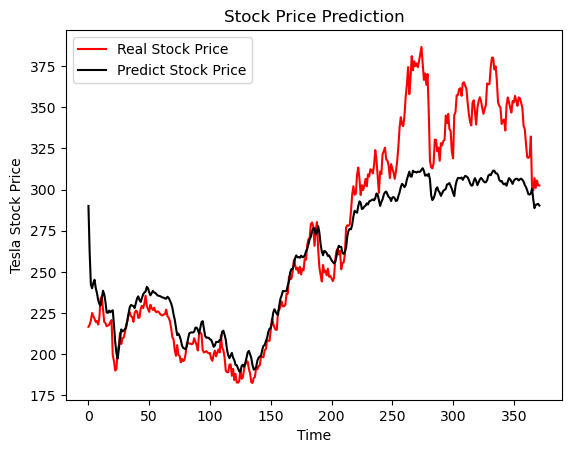

In [155]:
plt.plot(real_price, color = "red", label = "Real Stock Price")
plt.plot(ans, color = "black", label = "Predict Stock Price")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Tesla Stock Price")
plt.legend()
plt.show()

In [156]:
# 이 구조를 LSTM으로 변경해보자.
# 많은 텍스트데이터가 들어가있다. 관심있는 회사에 대해서 모델을 만들어보자. 
# 변경해보고 비교해보자. 대체로LSTM이 잘 맞을 것이다. 